# 🔎 Análisis Exploratorio de Datos:

In [21]:
from textblob import TextBlob
import datetime
import inspect
import re
import matplotlib.pyplot as plt
import inspect
import pandas as pd
import gzip
import os
import seaborn as sns
import numpy as np
from data_utils import data_type_check


In [4]:
# Cargar los datos Yelp
business_df = pd.read_parquet('../0_Dataset/Data_Limpia/Yelp/business.parquet')
users_df = pd.read_parquet('../0_Dataset/Data_Limpia/Yelp/user_reducido.parquet')
reviews_df = pd.read_parquet('../0_Dataset/Data_Limpia/Yelp/review_FL_reducido.parquet')
checkin_df = pd.read_parquet('../0_Dataset/Data_Limpia/Yelp/checkin_reducido.parquet')
tip_df = pd.read_parquet('../0_Dataset/Data_Limpia/Yelp/tip.parquet')


In [23]:
#cargar los datos google y metadata 
metadata_df = pd.read_parquet('../0_Dataset/Data_Limpia/Google/G_metadata_FL.parquet')
review_google_df = pd.read_parquet('../0_Dataset/Data_Limpia/Google/G_review_FL_reducido.parquet')

#### Validacion de los datos, nulos y duplicados


In [25]:
data_type_check(metadata_df)


 Resumen del dataframe:

Dimensiones:  (220001, 15)
             columna  %_no_nulos  %_nulos  total_nulos tipo_dato
0               name      100.00     0.00            5    object
1            address       97.15     2.85         6275    object
2            gmap_id      100.00     0.00            0    object
3        description        7.16    92.84       204255    object
4           latitude      100.00     0.00            0   float64
5          longitude      100.00     0.00            0   float64
6           category       99.35     0.65         1428    object
7         avg_rating      100.00     0.00            0   float64
8     num_of_reviews      100.00     0.00            0     int64
9              price        7.68    92.32       203095    object
10             hours       72.82    27.18        59802    object
11              MISC       75.58    24.42        53728    object
12             state       74.25    25.75        56652    object
13  relative_results       89.49    1

In [209]:
metadata_df = metadata_df.drop(columns=['description', 'price', 'MISC', 'hours', 'category', 'state', 'relative_results'])


In [210]:
metadata_df = metadata_df.dropna()

In [211]:
data_type_check(metadata_df)

--- metadata_df ---
<class 'pandas.core.frame.DataFrame'>
Index: 213726 entries, 1302883 to 1253187
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            213726 non-null  object 
 1   address         213726 non-null  object 
 2   gmap_id         213726 non-null  object 
 3   latitude        213726 non-null  float64
 4   longitude       213726 non-null  float64
 5   avg_rating      213726 non-null  float64
 6   num_of_reviews  213726 non-null  int64  
 7   url             213726 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 14.7+ MB
None




In [26]:
data_type_check(review_google_df)


 Resumen del dataframe:

Dimensiones:  (712500, 8)
   columna  %_no_nulos  %_nulos  total_nulos tipo_dato
0  user_id      100.00     0.00            0   float64
1     name      100.00     0.00            0    object
2     time      100.00     0.00            0     int64
3   rating      100.00     0.00            0     int64
4     text       62.09    37.91       270081    object
5     pics        3.66    96.34       686417    object
6     resp       16.02    83.98       598322    object
7  gmap_id      100.00     0.00            0    object


In [27]:
review_google_df = review_google_df.drop(columns=["pics", "resp", 'text'], axis = 1)

In [28]:
review_google_df.isnull().sum()

user_id    0
name       0
time       0
rating     0
gmap_id    0
dtype: int64

In [31]:
data_type_check(business_df)


 Resumen del dataframe:

Dimensiones:  (668575, 15)
         columna  %_no_nulos  %_nulos  total_nulos tipo_dato
0    business_id       100.0      0.0            0    object
1           name       100.0      0.0            0    object
2        address       100.0      0.0            0    object
3           city       100.0      0.0            0    object
4          state       100.0      0.0            0    object
5    postal_code       100.0      0.0            0    object
6       latitude       100.0      0.0            0   float64
7      longitude       100.0      0.0            0   float64
8          stars       100.0      0.0            0   float64
9   review_count       100.0      0.0            0     int64
10       is_open       100.0      0.0            0     int64
11    attributes       100.0      0.0            0    object
12    categories       100.0      0.0            0    object
13         hours       100.0      0.0            0    object
14  parsed_hours       100.0    

In [32]:
data_type_check(reviews_df)


 Resumen del dataframe:

Dimensiones:  (209708, 9)
       columna  %_no_nulos  %_nulos  total_nulos       tipo_dato
0    review_id       100.0      0.0            0          object
1      user_id       100.0      0.0            0          object
2  business_id       100.0      0.0            0          object
3        stars       100.0      0.0            0           int64
4       useful       100.0      0.0            0           int64
5        funny       100.0      0.0            0           int64
6         cool       100.0      0.0            0           int64
7         text       100.0      0.0            0          object
8         date       100.0      0.0            0  datetime64[us]


In [33]:
data_type_check(users_df)


 Resumen del dataframe:

Dimensiones:  (63168, 22)
               columna  %_no_nulos  %_nulos  total_nulos tipo_dato
0              user_id       100.0      0.0            0    object
1                 name       100.0      0.0            0    object
2         review_count       100.0      0.0            0     int64
3        yelping_since       100.0      0.0            0    object
4               useful       100.0      0.0            0     int64
5                funny       100.0      0.0            0     int64
6                 cool       100.0      0.0            0     int64
7                elite       100.0      0.0            0    object
8              friends       100.0      0.0            0    object
9                 fans       100.0      0.0            0     int64
10       average_stars       100.0      0.0            0   float64
11      compliment_hot       100.0      0.0            0     int64
12     compliment_more       100.0      0.0            0     int64
13  compli

In [34]:
data_type_check(checkin_df)


 Resumen del dataframe:

Dimensiones:  (92351, 2)
       columna  %_no_nulos  %_nulos  total_nulos tipo_dato
0  business_id       100.0      0.0            0    object
1         date       100.0      0.0            0    object


In [35]:
data_type_check(tip_df)


 Resumen del dataframe:

Dimensiones:  (908915, 5)
            columna  %_no_nulos  %_nulos  total_nulos       tipo_dato
0           user_id       100.0      0.0            0          object
1       business_id       100.0      0.0            0          object
2              text       100.0      0.0            0          object
3              date       100.0      0.0            0  datetime64[us]
4  compliment_count       100.0      0.0            0           int64


In [221]:
# Función para verificar valores duplicados y eliminarlos
def eliminar_duplicados(df, nombre_df):
    columnas_excluir = [col for col in df.columns if isinstance(df[col].iloc[0], (list, dict))]
    df_sin_columnas_no_hashables = df.drop(columns=columnas_excluir)
    
    duplicados = df_sin_columnas_no_hashables.duplicated().sum()
    print(f"{nombre_df} tiene {duplicados} filas duplicadas.")
    
    df_sin_duplicados = df.drop_duplicates(subset=df_sin_columnas_no_hashables.columns)
    print(f"{nombre_df} después de eliminar duplicados tiene {df_sin_duplicados.shape[0]} filas.")
    print("\n")
    
    return df_sin_duplicados

#implementacion de la funcion creada anteriormente
business_df = eliminar_duplicados(business_df, 'business_df')
review_df = eliminar_duplicados(reviews_df, 'review_df')
user_df = eliminar_duplicados(users_df, 'user_df')
checkin_df = eliminar_duplicados(checkin_df, 'checkin_df')
tip_df = eliminar_duplicados(tip_df, 'tip_df')
metadata_df = eliminar_duplicados(metadata_df, 'metadata_df')


business_df tiene 43 filas duplicadas.
business_df después de eliminar duplicados tiene 668532 filas.


review_df tiene 0 filas duplicadas.
review_df después de eliminar duplicados tiene 209708 filas.


user_df tiene 230 filas duplicadas.
user_df después de eliminar duplicados tiene 62938 filas.


checkin_df tiene 0 filas duplicadas.
checkin_df después de eliminar duplicados tiene 92351 filas.


tip_df tiene 67 filas duplicadas.
tip_df después de eliminar duplicados tiene 908848 filas.


metadata_df tiene 233 filas duplicadas.
metadata_df después de eliminar duplicados tiene 213493 filas.




#### Deteccion y muestra de Distribucion de datos y outliers

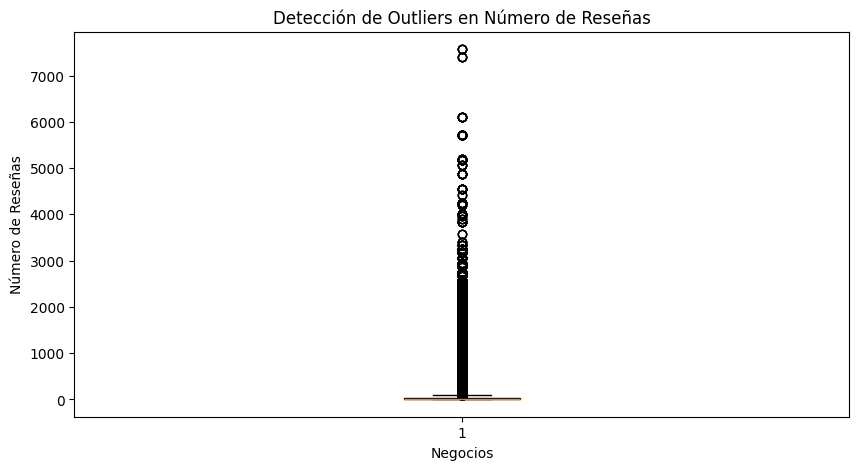

In [228]:
plt.figure(figsize=(10, 5))
plt.boxplot(business_df['review_count'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Negocios')
plt.ylabel('Número de Reseñas')
plt.title('Detección de Outliers en Número de Reseñas')
plt.show()


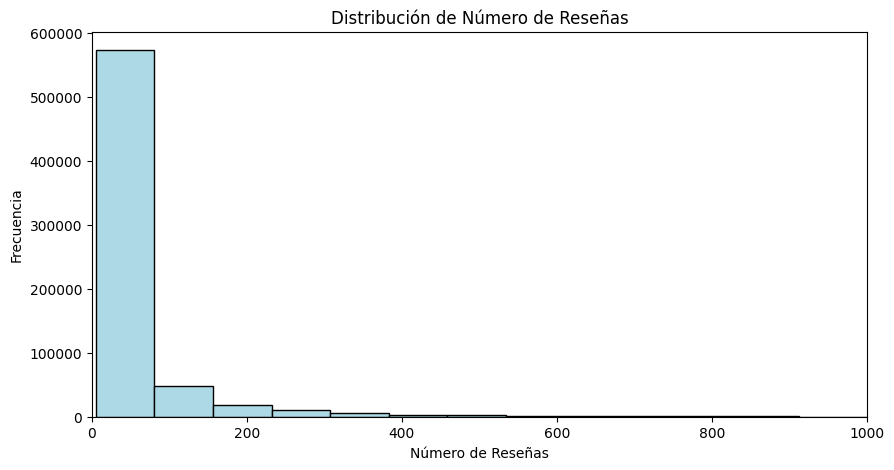

In [234]:
plt.figure(figsize=(10, 5))
plt.hist(business_df['review_count'].dropna(), bins=100, edgecolor='black', color='lightblue')
plt.xlabel('Número de Reseñas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Número de Reseñas')
plt.xlim(0, 1000)
plt.show()


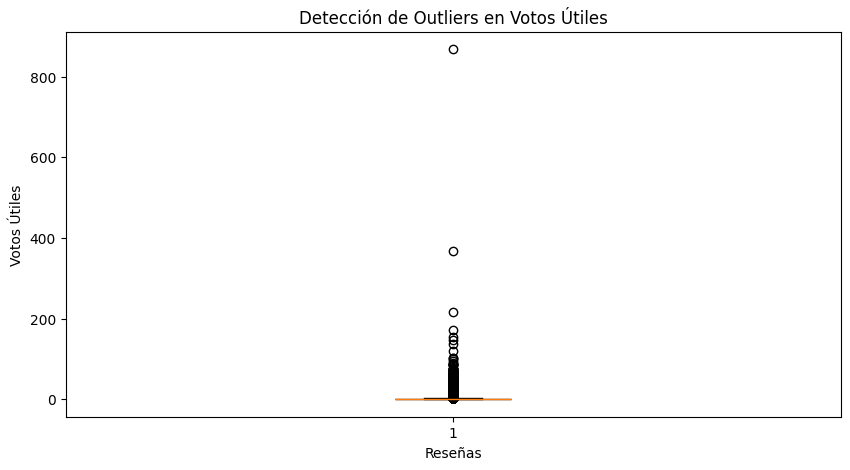

In [229]:
plt.figure(figsize=(10, 5))
plt.boxplot(reviews_df['useful'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.xlabel('Reseñas')
plt.ylabel('Votos Útiles')
plt.title('Detección de Outliers en Votos Útiles')
plt.show()


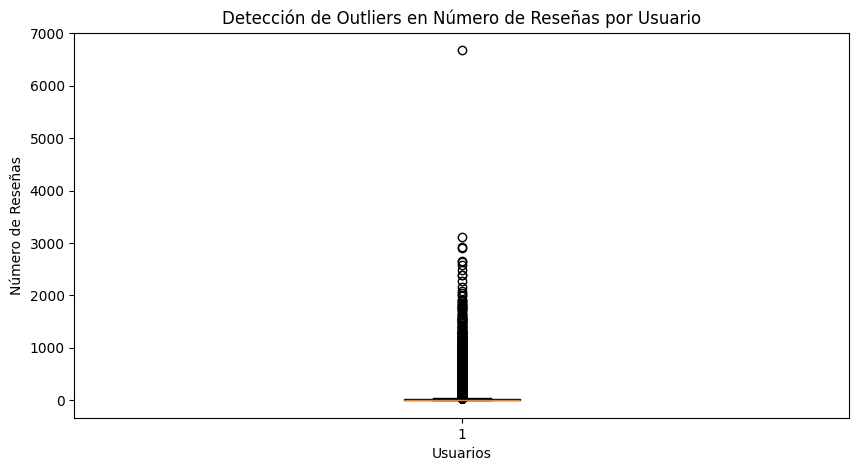

In [236]:
plt.figure(figsize=(10, 5))
plt.boxplot(users_df['review_count'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.xlabel('Usuarios')
plt.ylabel('Número de Reseñas')
plt.title('Detección de Outliers en Número de Reseñas por Usuario')
plt.show()

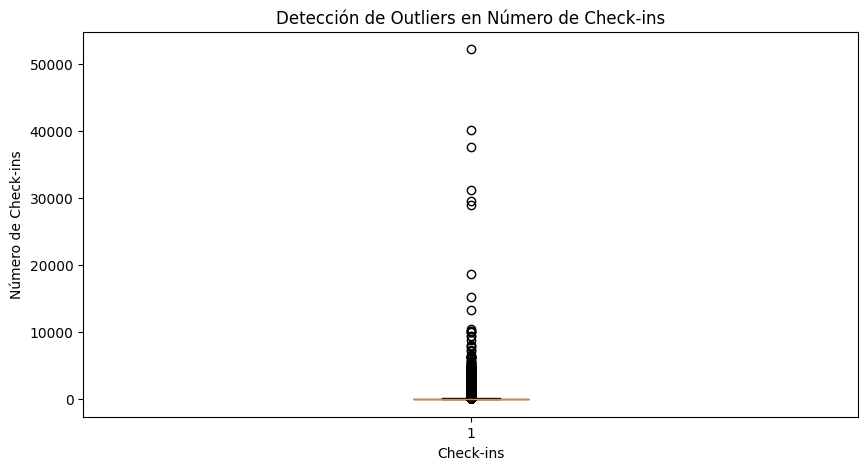

In [237]:
checkin_counts = checkin_df['date'].str.split(',').apply(len)

plt.figure(figsize=(10, 5))
plt.boxplot(checkin_counts.dropna(), patch_artist=True, boxprops=dict(facecolor='lightsalmon'))
plt.xlabel('Check-ins')
plt.ylabel('Número de Check-ins')
plt.title('Detección de Outliers en Número de Check-ins')
plt.show()

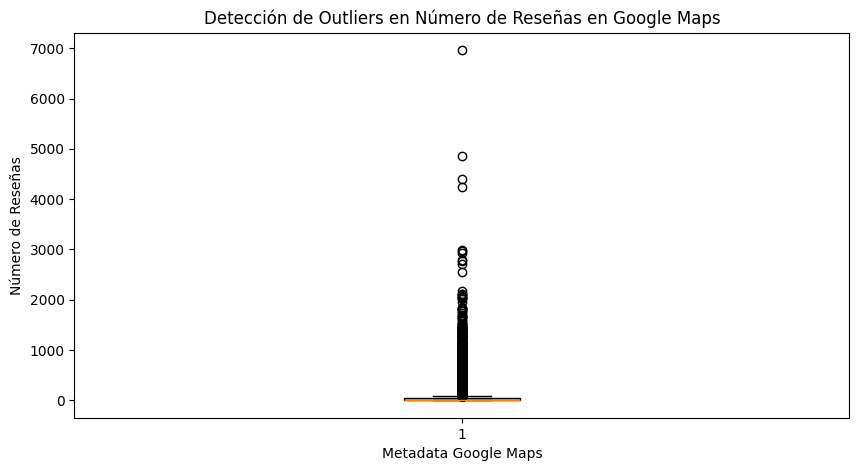

In [239]:
plt.figure(figsize=(10, 5))
plt.boxplot(metadata_df['num_of_reviews'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightcyan'))
plt.xlabel('Metadata Google Maps')
plt.ylabel('Número de Reseñas')
plt.title('Detección de Outliers en Número de Reseñas en Google Maps')
plt.show()


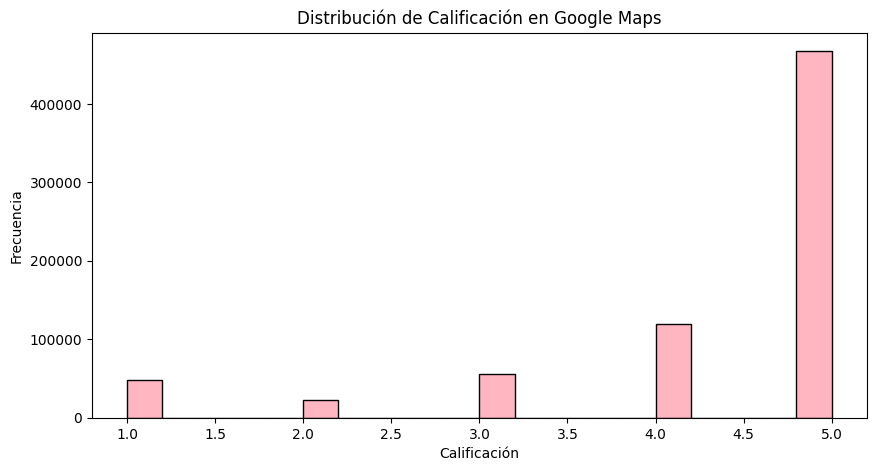

In [247]:
plt.figure(figsize=(10, 5))
plt.hist(review_google_df['rating'].dropna(), bins=20, edgecolor='black', color='lightpink')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.title('Distribución de Calificación en Google Maps')
plt.show()


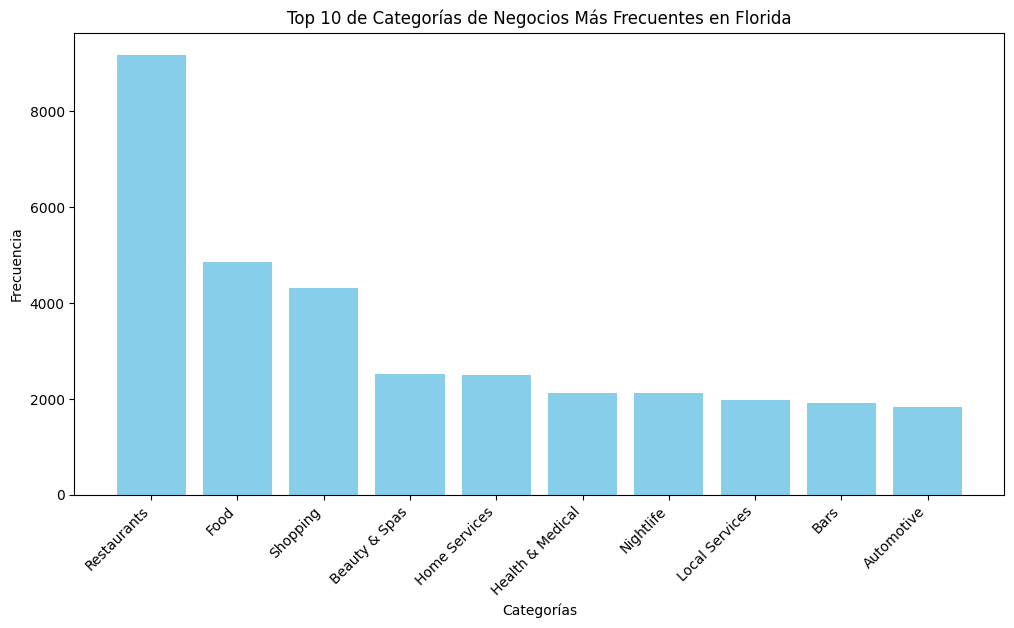

In [10]:
from collections import Counter
florida_business_df = business_df[business_df['state'] == 'FL']
all_categories = florida_business_df['categories'].dropna().values
all_categories_list = []
for categories in all_categories:
    all_categories_list.extend(categories.split(', '))
category_counts = Counter(all_categories_list)
top_10_categories = category_counts.most_common(10)
categories, counts = zip(*top_10_categories)

plt.figure(figsize=(12, 6))
plt.bar(categories, counts, color='skyblue')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Top 10 de Categorías de Negocios Más Frecuentes en Florida')
plt.xticks(rotation=45, ha='right')
plt.show()

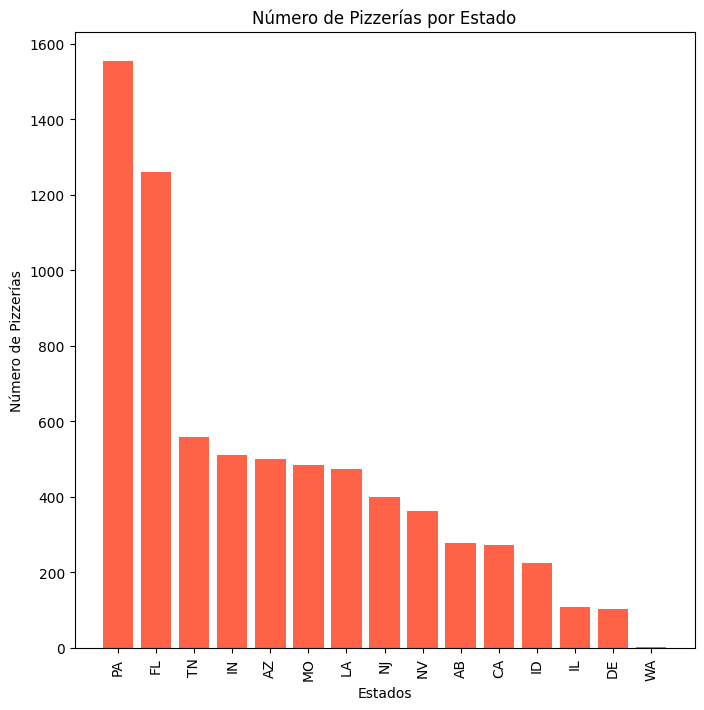

In [12]:
pizza_business_df = business_df[business_df['categories'].str.contains('Pizza', case=False, na=False)]
state_counts = pizza_business_df['state'].value_counts()
states, counts = zip(*state_counts.items())


plt.figure(figsize=(8, 8))
plt.bar(states, counts, color='tomato')
plt.xlabel('Estados')
plt.ylabel('Número de Pizzerías')
plt.title('Número de Pizzerías por Estado')
plt.xticks(rotation=90)
plt.show()

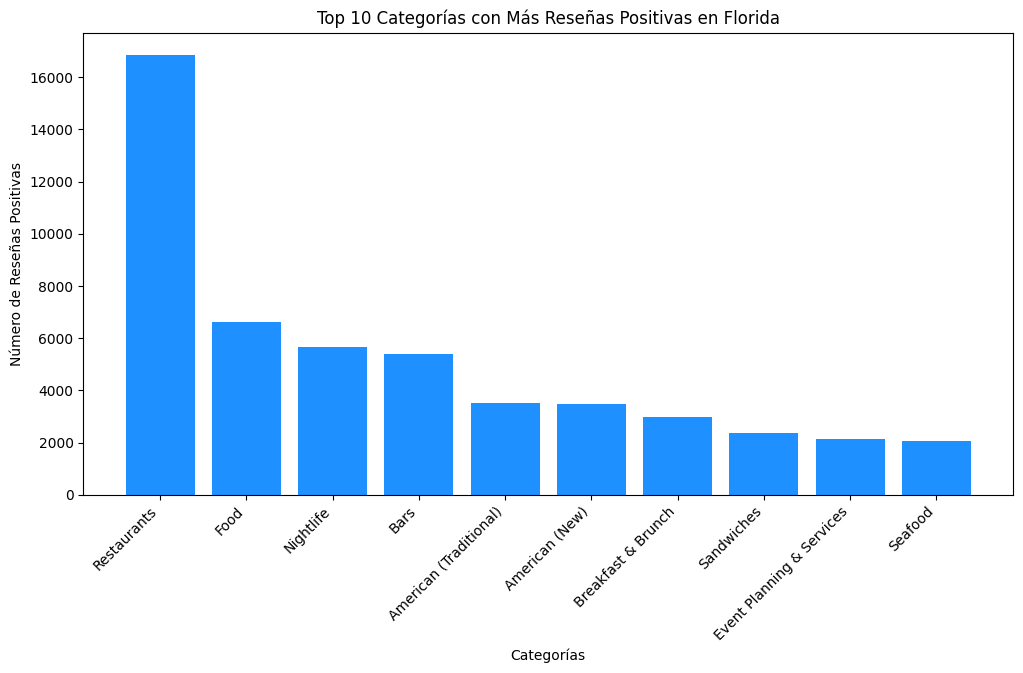

In [17]:
import matplotlib.pyplot as plt
from collections import Counter

# Filtrar los datos de negocio por el estado de Florida
florida_business_df = business_df[business_df['state'] == 'FL']

# Filtrar las reseñas que corresponden a los negocios en Florida
florida_reviews_df = reviews_df[reviews_df['business_id'].isin(florida_business_df['business_id'])]

# Filtrar reseñas positivas (4 y 5 estrellas) en Florida
positive_reviews_df = florida_reviews_df[florida_reviews_df['stars'] >= 4]

# Combinar las reseñas positivas con los datos de negocio para obtener las categorías
positive_reviews_with_categories = positive_reviews_df.merge(florida_business_df[['business_id', 'categories']], on='business_id')

# Concatenar todas las categorías en una sola cadena de texto
all_categories = positive_reviews_with_categories['categories'].dropna().values

# Dividir la cadena en categorías individuales
all_categories_list = []
for categories in all_categories:
    all_categories_list.extend(categories.split(', '))

# Contar la frecuencia de cada categoría
category_counts = Counter(all_categories_list)

# Obtener las 10 categorías más comunes
top_10_categories = category_counts.most_common(10)

# Separar las categorías y sus conteos
categories, counts = zip(*top_10_categories)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(categories, counts, color='dodgerblue')
plt.xlabel('Categorías')
plt.ylabel('Número de Reseñas Positivas')
plt.title('Top 10 Categorías con Más Reseñas Positivas en Florida')
plt.xticks(rotation=45, ha='right')
plt.show()

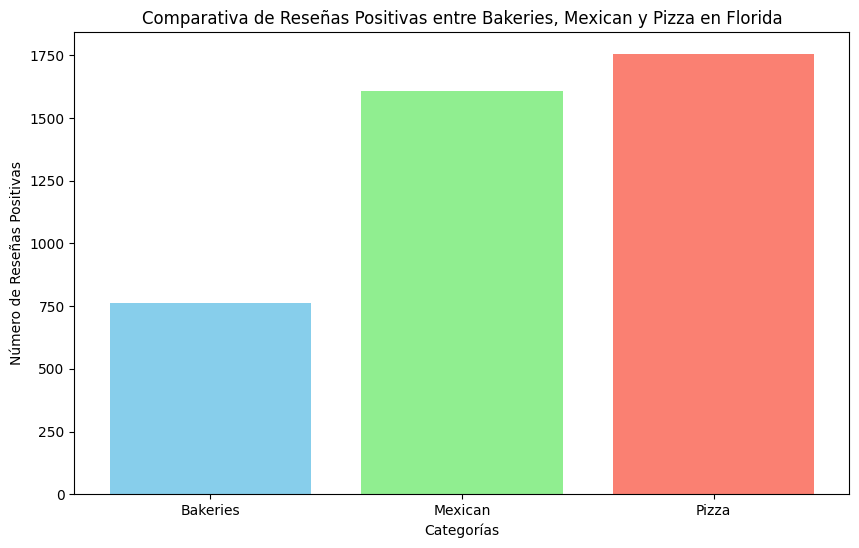

In [20]:
florida_business_df = business_df[business_df['state'] == 'FL']

florida_reviews_df = reviews_df[reviews_df['business_id'].isin(florida_business_df['business_id'])]
positive_reviews_df = florida_reviews_df[florida_reviews_df['stars'] >= 4]
positive_reviews_with_categories = positive_reviews_df.merge(florida_business_df[['business_id', 'categories']], on='business_id')
categories_of_interest = ['Bakeries', 'Mexican', 'Pizza']
positive_reviews_filtered = positive_reviews_with_categories[positive_reviews_with_categories['categories'].str.contains('|'.join(categories_of_interest), case=False, na=False)]
category_counts = {category: 0 for category in categories_of_interest}
for _, row in positive_reviews_filtered.iterrows():
    for category in categories_of_interest:
        if category in row['categories']:
            category_counts[category] += 1
categories, counts = zip(*category_counts.items())

plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Categorías')
plt.ylabel('Número de Reseñas Positivas')
plt.title('Comparativa de Reseñas Positivas entre Bakeries, Mexican y Pizza en Florida')
plt.show()